

# Basic Digital Imaging Notions For The Life Scientist

    Author : Yannick Krempp
    Cellular Imaging Facility
    27.02.2020


## 1) A digital image is just a table of numbers

A digital image is just a table of numbers or a set of tables in the case of mutliple channels that represent the pixels and their respective intensities.

To illustrate this concept, we can fill a table with random values of 0 and 1 and display it as an image, and compare it to an actual image:

Text(0.5, 1.0, 'A complex image of size (56, 256, 256, 3) \n (showing only frame 20) \n Sample coming from Fiji ')

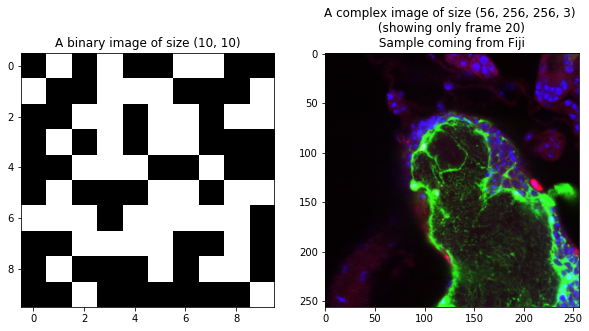

In [46]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import random

random.seed()
df = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
big_image = io.imread('images/first-instar-brain.tif') 

fig, ax = plt.subplots(figsize=(10,10), ncols=2)

ax[0].imshow(df, cmap='gray')
ax[0].set_title(f"A binary image of size {df.shape}")

ax[1].imshow(big_image[20,:,:,:], cmap='gray')
ax[1].set_title(f"A complex image of size {big_image.shape} \n (showing only frame 20) \n Sample coming from Fiji ")

The right image is a sample from Fiji with 3 channels and 56 slices.

#### We can display some of their values to understand how they are encoded :

In [47]:
print('Binary image: \n\n', df.head(100),'\n')
print('Big image: \n\n', big_image[20,:,:,:])

Binary image: 

    0  1  2  3  4  5  6  7  8  9
0  0  1  0  1  0  0  1  1  0  0
1  1  0  0  1  1  1  0  0  0  1
2  0  0  1  1  0  1  1  0  1  1
3  0  1  0  1  0  1  1  0  0  0
4  0  0  1  1  1  0  0  1  0  0
5  0  1  0  0  0  1  1  0  1  1
6  1  1  1  0  1  1  1  1  1  0
7  0  0  1  1  1  1  0  0  1  0
8  0  1  0  0  0  1  0  1  1  0
9  0  0  1  0  0  0  0  0  0  1 

Big image: 

 [[[  4   1   2]
  [  4   1   2]
  [  5   1   2]
  ...
  [ 58  68  36]
  [ 60  68  35]
  [ 45  41  26]]

 [[  4   1   2]
  [  4   1   2]
  [  6   1   3]
  ...
  [ 60  65  33]
  [ 62  69  32]
  [ 54  42  27]]

 [[  4   1   2]
  [  4   1   2]
  [  5   1   2]
  ...
  [ 67  54  32]
  [ 61  56  30]
  [ 57  29  25]]

 ...

 [[  8   0   7]
  [ 10   1   6]
  [ 11   1   9]
  ...
  [ 60 144 138]
  [ 62 154 184]
  [ 71 169 164]]

 [[  6   0   5]
  [  8   0   5]
  [ 12   0   6]
  ...
  [ 59 105 176]
  [ 58 138 241]
  [ 72 179 218]]

 [[ 10   2   7]
  [  9   2   6]
  [ 12   2   6]
  ...
  [ 58 103 183]
  [ 68 128 224]
  [

## 2) Bit Depth

The pixels have values. The range of these values is depending on the bit depth chosen by the user or decided by the device used to produce the image.

**Here are several images with different bitdepth**

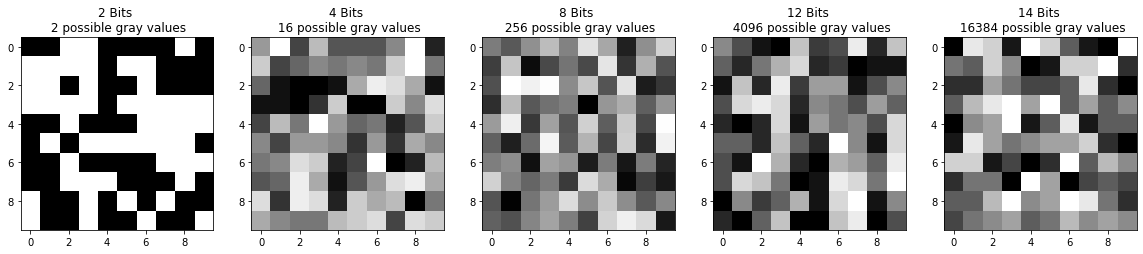

In [48]:
df_2bit = pd.DataFrame(np.random.randint(0,2,size=(10, 10)))
df_4bit = pd.DataFrame(np.random.randint(0,16,size=(10, 10)))
df_8bit = pd.DataFrame(np.random.randint(0,256,size=(10, 10)))
df_12bit = pd.DataFrame(np.random.randint(0,2^12,size=(10, 10)))
df_14bit = pd.DataFrame(np.random.randint(0,2^14,size=(10, 10)))

fig = plt.figure(figsize=(20,20))

fig.add_subplot(1,5,1)
plt.title('2 Bits \n 2 possible gray values')
plt.imshow(df_2bit, cmap='gray')

fig.add_subplot(1,5,2)
plt.title('4 Bits \n 16 possible gray values')
plt.imshow(df_4bit,cmap='gray')

fig.add_subplot(1,5,3)
plt.title('8 Bits \n 256 possible gray values')
plt.imshow(df_8bit,cmap='gray')

fig.add_subplot(1,5,4)
plt.title('12 Bits \n 4096 possible gray values')
plt.imshow(df_12bit,cmap='gray')

fig.add_subplot(1,5,5)
plt.title('14 Bits \n 16384 possible gray values')
plt.imshow(df_14bit,cmap='gray')




## 3) Image size

Commonly, people refer to image size as how large they see the image displayed. An image's **digital size** (or **dimension**) is only defined by its size **in pixels**.

On the  other hand, the way a digital image is displayed **in physical size** depends also on the **characteristics of the  medium** it is represented on. If the medium allows it, it can also be decided by the user.

A computer screen has a fixed number of pixels of fixed size, allowing **only 1 true 100% representation of the data**. Every other representation will rely on **interpolation**.

**Paper has no such limitation** and the user can decide what size the pixels should be and have multiple 100% representations. **There no true 100% representation of a digital image on paper** since the pixel itself is interpolated and created by the printer that decides how many drops of inks it needs to represent it.

When printing an image, the user has to decide what size the pixels of image should be, but also he can also decide what size to overall image should be by relying on interpolation.

**If the user doesn't want to use interpolation when printing** to avoid resizing artifacts, then **the size of the image is solely decided by its pixel size**, which is represented by a number, the number of **DPI** or Dots Per Inches.

### 3.1) Physical size

As an example, here's the same image displayed at two different physical sizes on your screen. The interpolation is handled by the drawing engine of the matplotlib library used to represent these images.


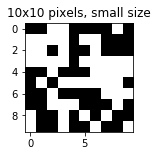

In [49]:
fig = plt.figure(figsize=(2,2))
fig.add_subplot(1,1,1)
plt.title('10x10 pixels, small size')
plt.imshow(df_2bit, cmap='gray')

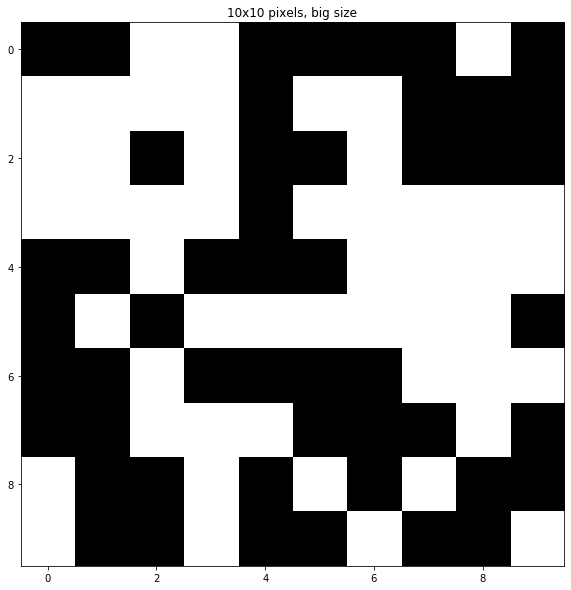

In [50]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,1,1)
plt.title('10x10 pixels, big size')
plt.imshow(df_2bit, cmap='gray')

### 3.2) Interpolation

If you represent **each pixel of the image with a single pixel on your computer screen**, you are viewing the image in its real dimension, or often refered to as **100% magnification.**

In every other cases you are actually using an **interpolation** to 
- recreate the missing pixels if you are upscaling the image,
or 
- finding the most reprensentative value of a group of pixels if you are downscaling the image.

**Here are some examples with our 10x10 pixels image:**

Text(0.5, 1.0, 'Bicubic')

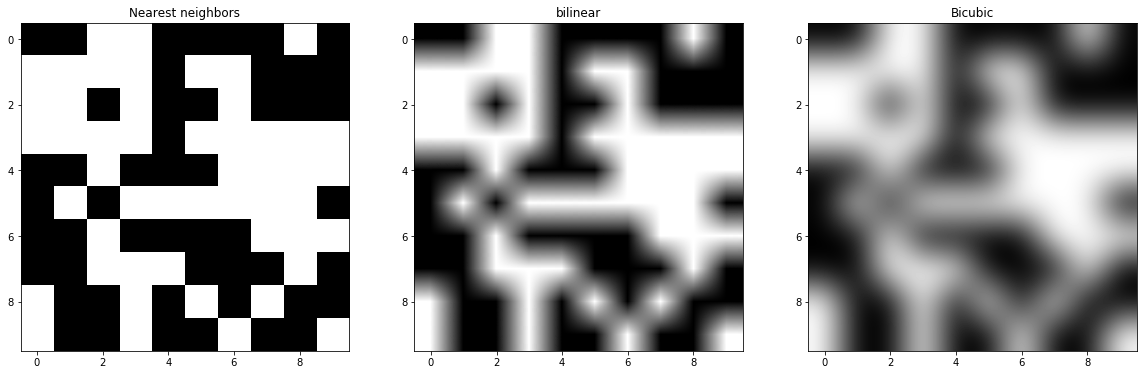

In [51]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

map1 = ax[0].imshow(df_2bit.astype(float), cmap='gray', interpolation='nearest')
ax[0].set_title('Nearest neighbors')

map2 = ax[1].imshow(df_2bit.astype(float),cmap='gray', interpolation='bilinear')
ax[1].set_title('bilinear')

map3 = ax[2].imshow(df_2bit.astype(float),cmap='gray', interpolation='bicubic')
ax[2].set_title('Bicubic')


### 3.3) DPI

**DPI** stand for **Dots Per Inch**. It represents the number of pixels printed per inch on a paper medium. **DPI has no meaning outside of printing**.

**DPI is inherently related to the medium supporting the image**: a computer screen has a certain number of physical pixels that cannot change. If you count the number of pixels of this screen along one inch, you are measuring its DPI. 

*TIP : Since this is the only value it can take, there is no point of using it if you never plan to print the image, because changing this value on Photoshop for example (without changing the pixel dimension !) will not change the image size on the screen.*

Media like paper do not have inherent DPI limitations like computer screens, and the user can decide at which DPI he wants to print an image. 

Another way of putting it is that **DPI is the resolution at which a digital image will be printed** on a specific medium.

**Here's an example of how the same image would print with different print settings:**

#### A ) A figure's size when set to be printed on a 50 dpi paper

- The **image data** is 256x256 pixels
- The **image** is drawn on a **canvas** of 500x500 pixels of the **same size as the data**
- The **figure**'s size is then **scaled** to make sure you have **50** pixels per inch on the paper **when printed at 50 DPI**
- The **figure**'s **resolution** is 50 DPI.

Text(0.5, 1.0, '256x256 image resized for printing at at 50 dpi')

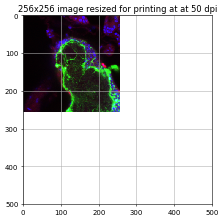

In [52]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=50)

ax.imshow(big_image[20,:,:,:])
ax.set_xlim(0,500)
ax.set_ylim(500,0)
ax.grid()
ax.set_title('256x256 image resized for printing at at 50 dpi')

#### B) The same figure's size when set to be printed on a 150 dpi paper.

- The **image data** is 256x256 pixels
- The **image** is drawn on a **canvas** of 500x500 pixels of the **same size as the data**
- The **figure**'s size is then **scaled** to make sure you have **150** pixels per inch on the paper **when printed at 150 DPI**
- The **figure**'s **resolution** is 150 DPI.

Text(0.5, 1.0, '256x256 image resized for printing at 150 dpi')

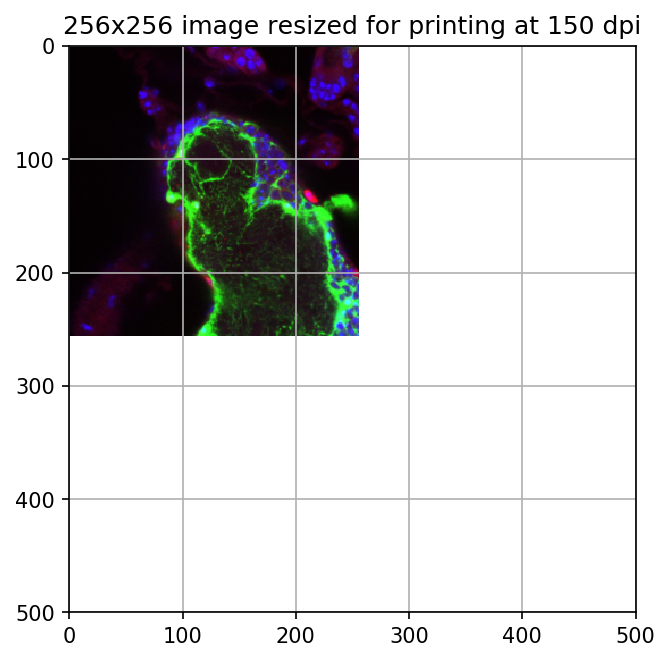

In [53]:
fig2, ax2 = plt.subplots(figsize=(5, 5), dpi=150)

big_image_slice = big_image[20,:,:,:]


#from skimage.transform import rescale, resize, downscale_local_mean
#image_resized = resize(big_image_slice, [500,500,3], anti_aliasing=False)

ax2.imshow(big_image[20,:,:,:])
ax2.set_xlim(0,500)
ax2.set_ylim(500,0)
ax2.grid()
ax2.set_title('256x256 image resized for printing at 150 dpi')

####  C) Comparisons of printing simulations

Both pictures will appear as having the same physical size when printed respectively on 50 DPI and  150 DPI canvas, but printing an image scaled for 50 DPI on a 150 DPI canvas will have it appear 3 times smaller.

Text(0.5, 1.0, 'Simulation of \n a 50 DPI image printed on a 150 DPI canvas')

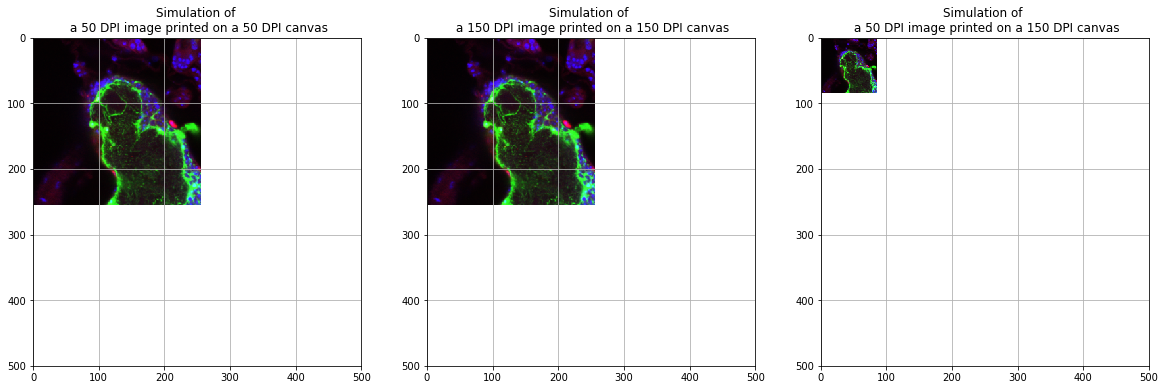

In [54]:
fig, ax = plt.subplots(figsize=(20, 20), ncols=3)

ax[0].imshow(big_image[20,:,:,:])
ax[0].set_xlim(0,500)
ax[0].set_ylim(500,0)
ax[0].grid()
ax[0].set_title('Simulation of \n a 50 DPI image printed on a 50 DPI canvas')

ax[1].imshow(big_image[20,:,:,:])
ax[1].set_xlim(0,500)
ax[1].set_ylim(500,0)
ax[1].grid()
ax[1].set_title('Simulation of \n a 150 DPI image printed on a 150 DPI canvas')


from skimage.transform import resize
image_resized = resize(big_image[20,:,:,:], [256//3,256//3,3], anti_aliasing=False)

ax[2].imshow(image_resized)
ax[2].set_xlim(0,500)
ax[2].set_ylim(500,0)
ax[2].grid()
ax[2].set_title('Simulation of \n a 50 DPI image printed on a 150 DPI canvas')

## 4) Colors in a mono channel digital image and LUTs

If you consider a single channel 12-bit digital image, a single number per pixel represents the intensity of the signal. Without additional information, **there is no specific color tied to the pixel values in the data itself**.

You can represent these values using gray levels, which is often the default in life science. But **you can also use a LUT (lookup table) or Colormap** to assign a specific color to each value and **create an artificial color representation of your data**.

Some colormaps are **gradients** from dark (low intensities) to light (high intensities), but there is also specialized colormaps than can **highlight** a change in intensity or texture, **split your data into several classes**, or **mimic reality** with a colorized version of a black and white image like a satellite image of an island.

**Here is the exact same image, but represented using different colormaps:**

- gray : *default*
- jet : *highlight high intensities*
- Set1 : *divide image into classes*
- flag : *highlight areas with high or low variabilities (texture)*
- terrain : *mimics a satellite view of land*

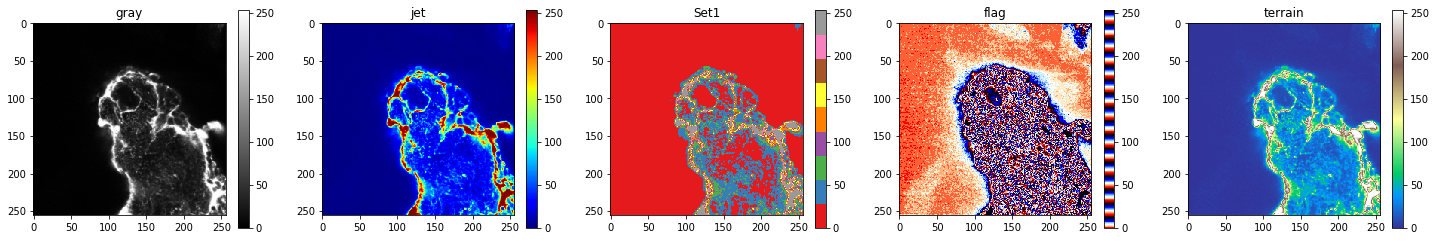

In [55]:
fig, ax = plt.subplots(figsize=(25, 4), ncols=5)

img = big_image[20,:,:,1]

map1 = ax[0].imshow(img.astype(float), cmap='gray')
ax[0].set_title('gray')
plt.colorbar(map1, ax=ax[0])

map2 = ax[1].imshow(img.astype(float),cmap='jet')
ax[1].set_title('jet')
fig.colorbar(map2,ax=ax[1])

map3 = ax[2].imshow(img.astype(float),cmap='Set1')
ax[2].set_title('Set1')
fig.colorbar(map3, ax=ax[2])

map4 = ax[3].imshow(img.astype(float),cmap='flag')
ax[3].set_title('flag')
fig.colorbar(map4, ax=ax[3])

map5 = ax[4].imshow(img.astype(float),cmap='terrain')
ax[4].set_title('terrain')
fig.colorbar(map5, ax=ax[4])
